# **라이브러리 불러오기**

In [599]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [600]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

# **[데이터 살펴보기]**

In [601]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [602]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [603]:
train.shape

(26457, 20)

In [604]:
test.shape

(10000, 19)

In [605]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

# **[데이터 전처리]**

**(주의) train data에 해준 그대로 test data 전처리**

## **1. 결측치 제거** 

In [606]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [607]:
train[train['occyp_type'].isnull()]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0
26443,26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,1,0,0,0,NaN,1.0,-21.0,1.0
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0


In [608]:
train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [609]:
train['occyp_type'] = train['occyp_type'].fillna('NaN')
test['occyp_type'] = test['occyp_type'].fillna('NaN')

In [610]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['occyp_type'] = le.fit_transform(train['occyp_type'])

In [611]:
le.classes_

array(['Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff',
       'Laborers', 'Low-skill Laborers', 'Managers', 'Medicine staff',
       'NaN', 'Private service staff', 'Realty agents', 'Sales staff',
       'Secretaries', 'Security staff', 'Waiters/barmen staff'],
      dtype=object)

In [612]:
test['occyp_type'] = le.transform(test['occyp_type'])
test['occyp_type']

0       12
1        3
2        8
3        4
4       10
        ..
9995     0
9996     8
9997    11
9998    12
9999     8
Name: occyp_type, Length: 10000, dtype: int64

In [613]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,12,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,8,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,10,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,15,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,10,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,3,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,12,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,3,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,8,1.0,-59.0,2.0


In [614]:
# train=train.drop('occyp_type', axis=1)
# test=test.drop('occyp_type', axis=1)

## **2. Binary variables**

In [615]:
train['gender'] = train['gender'].replace(['F','M'],[0,1])
test['gender'] = test['gender'].replace(['F','M'],[0,1])
print('gender :')
print(train['gender'].value_counts())
print('--------------')

print('Having a car or not : ')
train['car'] = train['car'].replace(['N','Y'],[0,1])
test['car'] = test['car'].replace(['N','Y'],[0,1])
print(train['car'].value_counts())
print('--------------')

print('Having house reality or not: ')
train['reality'] = train['reality'].replace(['N','Y'],[0,1])
test['reality'] = test['reality'].replace(['N','Y'],[0,1])
print(train['reality'].value_counts())
print('--------------')

print('Having a phone or not: ')
print(train['phone'].value_counts())
print('--------------')


print('Having a email or not: ')
print(train['email'].value_counts())
print('--------------')


print('Having a work phone or not: ')
print(train['work_phone'].value_counts())
print('--------------')

gender :
0    17697
1     8760
Name: gender, dtype: int64
--------------
Having a car or not : 
0    16410
1    10047
Name: car, dtype: int64
--------------
Having house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
--------------
Having a phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
--------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
--------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
--------------


### **Type**

In [616]:
print(train['income_type'].unique())
print(train['edu_type'].unique())
print(train['family_type'].unique())
print(train['house_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [617]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])
########################################################################
train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])
########################################################################
train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])
########################################################################
train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])
########################################################################
# train['income_total']=label_encoder.fit_transform(train['income_total'])
# test['income_total']=label_encoder.fit_transform(test['income_total'])

In [618]:
display(train, test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,1,0,0,0,12,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,1,0,0,1,8,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,1,0,1,0,10,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,1,0,1,0,15,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,1,0,0,0,10,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,-12079,-1984,1,0,0,0,3,4.0,-2.0,1.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,-15291,-2475,1,0,0,0,12,2.0,-47.0,2.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,-10082,-2015,1,0,0,0,3,2.0,-25.0,2.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,-10145,-107,1,0,0,0,8,1.0,-59.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,-21990,365243,1,0,1,0,12,2.0,-60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,-18964,-8671,1,0,1,0,3,2.0,-36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,-15887,-217,1,1,1,0,8,2.0,-40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,-19270,-2531,1,1,0,0,4,2.0,-41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,-17822,-9385,1,1,0,0,10,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,-18593,-5434,1,1,1,0,0,2.0,-19.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,-10886,-1315,1,1,0,0,8,2.0,-34.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,-21016,-14018,1,0,0,0,11,2.0,-55.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,-16541,-1085,1,0,1,0,12,2.0,-33.0


## **4. Minus continuous variable**

<AxesSubplot:xlabel='begin_month', ylabel='Count'>

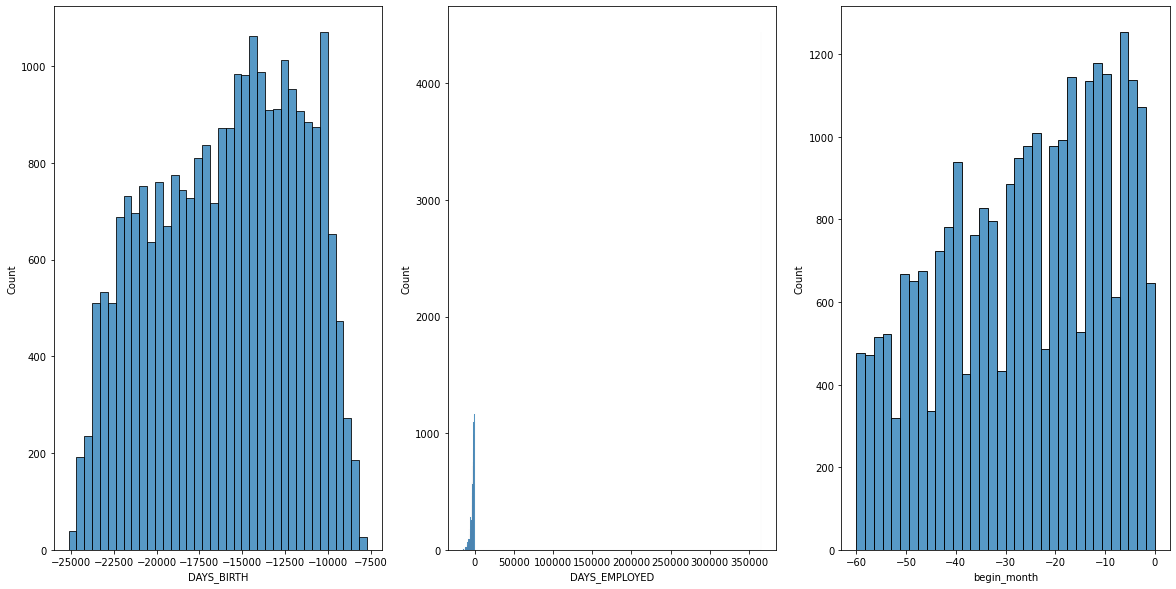

In [619]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.histplot(train['DAYS_BIRTH'], ax=axs[0])
sns.histplot(train['DAYS_EMPLOYED'], ax=axs[1])
sns.histplot(train['begin_month'], ax=axs[2])

In [620]:
col = ['DAYS_BIRTH', 'begin_month']
for i in col:
    train[i] = np.abs(train[i])
    test[i] = np.abs(test[i])
display(train,test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,13899,-4709,1,0,0,0,12,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,11380,-1540,1,0,0,1,8,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,19087,-4434,1,0,1,0,10,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,15088,-2092,1,0,1,0,15,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,15037,-2105,1,0,0,0,10,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,12079,-1984,1,0,0,0,3,4.0,2.0,1.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,15291,-2475,1,0,0,0,12,2.0,47.0,2.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,10082,-2015,1,0,0,0,3,2.0,25.0,2.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,10145,-107,1,0,0,0,8,1.0,59.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,21990,365243,1,0,1,0,12,2.0,60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,18964,-8671,1,0,1,0,3,2.0,36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,15887,-217,1,1,1,0,8,2.0,40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,19270,-2531,1,1,0,0,4,2.0,41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,17822,-9385,1,1,0,0,10,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,18593,-5434,1,1,1,0,0,2.0,19.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,10886,-1315,1,1,0,0,8,2.0,34.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,21016,-14018,1,0,0,0,11,2.0,55.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,16541,-1085,1,0,1,0,12,2.0,33.0


# DAYS_EMPLOYED
If days_employed > 0, consider the person is unemployed.

In [621]:
train['DAYS_EMPLOYED'] = train['DAYS_EMPLOYED'].map(lambda x:0 if x>0 else x)
test['DAYS_EMPLOYED'] = test['DAYS_EMPLOYED'].map(lambda x:0 if x>0 else x)
display(train, test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,13899,-4709,1,0,0,0,12,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,11380,-1540,1,0,0,1,8,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,19087,-4434,1,0,1,0,10,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,15088,-2092,1,0,1,0,15,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,15037,-2105,1,0,0,0,10,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,12079,-1984,1,0,0,0,3,4.0,2.0,1.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,15291,-2475,1,0,0,0,12,2.0,47.0,2.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,10082,-2015,1,0,0,0,3,2.0,25.0,2.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,10145,-107,1,0,0,0,8,1.0,59.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,21990,0,1,0,1,0,12,2.0,60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,18964,-8671,1,0,1,0,3,2.0,36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,15887,-217,1,1,1,0,8,2.0,40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,19270,-2531,1,1,0,0,4,2.0,41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,17822,-9385,1,1,0,0,10,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,18593,-5434,1,1,1,0,0,2.0,19.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,10886,-1315,1,1,0,0,8,2.0,34.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,21016,-14018,1,0,0,0,11,2.0,55.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,16541,-1085,1,0,1,0,12,2.0,33.0


# Negative values to positive values

In [622]:
train['DAYS_EMPLOYED'] = np.abs(train['DAYS_EMPLOYED'])
test['DAYS_EMPLOYED'] = np.abs(test['DAYS_EMPLOYED'])
display(train, test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,13899,4709,1,0,0,0,12,2.0,6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,11380,1540,1,0,0,1,8,3.0,5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,19087,4434,1,0,1,0,10,2.0,22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,15088,2092,1,0,1,0,15,2.0,37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,15037,2105,1,0,0,0,10,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,12079,1984,1,0,0,0,3,4.0,2.0,1.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,15291,2475,1,0,0,0,12,2.0,47.0,2.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,10082,2015,1,0,0,0,3,2.0,25.0,2.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,10145,107,1,0,0,0,8,1.0,59.0,2.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,1,1,0,0,112500.0,1,4,0,1,21990,0,1,0,1,0,12,2.0,60.0
1,26458,0,0,1,0,135000.0,2,1,1,1,18964,8671,1,0,1,0,3,2.0,36.0
2,26459,0,0,1,0,69372.0,4,4,1,1,15887,217,1,1,1,0,8,2.0,40.0
3,26460,1,1,0,0,112500.0,0,4,1,1,19270,2531,1,1,0,0,4,2.0,41.0
4,26461,0,1,1,0,225000.0,2,1,1,1,17822,9385,1,1,0,0,10,2.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,18593,5434,1,1,1,0,0,2.0,19.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,10886,1315,1,1,0,0,8,2.0,34.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,21016,14018,1,0,0,0,11,2.0,55.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,16541,1085,1,0,1,0,12,2.0,33.0


In [623]:
train['ID'] = train['gender'].astype(str) + train['car'].astype(str) + train['reality'].astype(str) + train['child_num'].astype(str) + train['income_total'].astype(str)\
+ train['income_type'].astype(str) + train['edu_type'].astype(str) + train['family_type'].astype(str) + train['house_type'].astype(str) + train['DAYS_BIRTH'].astype(str)\
+ train['DAYS_EMPLOYED'].astype(str) + train['work_phone'].astype(str) + train['phone'].astype(str) + train['email'].astype(str) + train['occyp_type'].astype(str)\
+ train['family_size'].astype(str)
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID
0,0,0,0,0,0,202500.0,0,1,1,2,...,4709,1,0,0,0,12,2.0,6.0,1.0,0000202500.00112138994709000122.0
1,1,0,0,1,1,247500.0,0,4,0,1,...,1540,1,0,0,1,8,3.0,5.0,1.0,0011247500.0040111380154000183.0
2,2,1,1,1,0,450000.0,4,1,1,1,...,4434,1,0,1,0,10,2.0,22.0,2.0,1110450000.04111190874434010102.0
3,3,0,0,1,0,202500.0,0,4,1,1,...,2092,1,0,1,0,15,2.0,37.0,0.0,0010202500.00411150882092010152.0
4,4,0,1,1,0,157500.0,2,1,1,1,...,2105,1,0,0,0,10,2.0,26.0,2.0,0110157500.02111150372105000102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,...,1984,1,0,0,0,3,4.0,2.0,1.0,0002225000.0241112079198400034.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,...,2475,1,0,0,0,12,2.0,47.0,2.0,0011180000.04121152912475000122.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,...,2015,1,0,0,0,3,2.0,25.0,2.0,0100292500.0440510082201500032.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,...,107,1,0,0,0,8,1.0,59.0,2.0,1010171000.042311014510700081.0


In [624]:
len(train['ID'].unique())

8759

In [625]:
test['ID'] = test['gender'].astype(str) + test['car'].astype(str) + test['reality'].astype(str) + test['child_num'].astype(str) + test['income_total'].astype(str)\
+ test['income_type'].astype(str) + test['edu_type'].astype(str) + test['family_type'].astype(str) + test['house_type'].astype(str) + test['DAYS_BIRTH'].astype(str)\
+ test['DAYS_EMPLOYED'].astype(str) + test['work_phone'].astype(str) + test['phone'].astype(str) + test['email'].astype(str) + test['occyp_type'].astype(str)\
+ test['family_size'].astype(str)

In [626]:
len(test['ID'].unique())

5585

In [627]:
display(train, test)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID
0,0,0,0,0,0,202500.0,0,1,1,2,...,4709,1,0,0,0,12,2.0,6.0,1.0,0000202500.00112138994709000122.0
1,1,0,0,1,1,247500.0,0,4,0,1,...,1540,1,0,0,1,8,3.0,5.0,1.0,0011247500.0040111380154000183.0
2,2,1,1,1,0,450000.0,4,1,1,1,...,4434,1,0,1,0,10,2.0,22.0,2.0,1110450000.04111190874434010102.0
3,3,0,0,1,0,202500.0,0,4,1,1,...,2092,1,0,1,0,15,2.0,37.0,0.0,0010202500.00411150882092010152.0
4,4,0,1,1,0,157500.0,2,1,1,1,...,2105,1,0,0,0,10,2.0,26.0,2.0,0110157500.02111150372105000102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,...,1984,1,0,0,0,3,4.0,2.0,1.0,0002225000.0241112079198400034.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,...,2475,1,0,0,0,12,2.0,47.0,2.0,0011180000.04121152912475000122.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,...,2015,1,0,0,0,3,2.0,25.0,2.0,0100292500.0440510082201500032.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,...,107,1,0,0,0,8,1.0,59.0,2.0,1010171000.042311014510700081.0


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,ID
0,26457,1,1,0,0,112500.0,1,4,0,1,21990,0,1,0,1,0,12,2.0,60.0,1100112500.01401219900010122.0
1,26458,0,0,1,0,135000.0,2,1,1,1,18964,8671,1,0,1,0,3,2.0,36.0,0010135000.0211118964867101032.0
2,26459,0,0,1,0,69372.0,4,4,1,1,15887,217,1,1,1,0,8,2.0,40.0,001069372.044111588721711082.0
3,26460,1,1,0,0,112500.0,0,4,1,1,19270,2531,1,1,0,0,4,2.0,41.0,1100112500.0041119270253110042.0
4,26461,0,1,1,0,225000.0,2,1,1,1,17822,9385,1,1,0,0,10,2.0,8.0,0110225000.02111178229385100102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,18593,5434,1,1,1,0,0,2.0,19.0,0110202500.0421118593543411002.0
9996,36453,1,1,1,0,202500.0,4,4,0,1,10886,1315,1,1,0,0,8,2.0,34.0,1110202500.0440110886131510082.0
9997,36454,0,0,1,0,292500.0,4,4,1,1,21016,14018,1,0,0,0,11,2.0,55.0,0010292500.044112101614018000112.0
9998,36455,0,1,0,0,180000.0,0,4,1,1,16541,1085,1,0,1,0,12,2.0,33.0,0100180000.00411165411085010122.0


In [628]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_data = pd.concat([train, test])
all_data['ID'] = le.fit_transform(all_data['ID'])
train2 = all_data[:len(train)]
test2 = all_data[len(train):]
test2 = test2.drop('credit', axis=1)
display(train2, test2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID
0,0,0,0,0,0,202500.0,0,1,1,2,...,4709,1,0,0,0,12,2.0,6.0,1.0,583
1,1,0,0,1,1,247500.0,0,4,0,1,...,1540,1,0,0,1,8,3.0,5.0,1.0,4348
2,2,1,1,1,0,450000.0,4,1,1,1,...,4434,1,0,1,0,10,2.0,22.0,2.0,9190
3,3,0,0,1,0,202500.0,0,4,1,1,...,2092,1,0,1,0,15,2.0,37.0,0.0,2777
4,4,0,1,1,0,157500.0,2,1,1,1,...,2105,1,0,0,0,10,2.0,26.0,2.0,5471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,...,1984,1,0,0,0,3,4.0,2.0,1.0,1427
26453,26453,0,0,1,1,180000.0,4,1,2,1,...,2475,1,0,0,0,12,2.0,47.0,2.0,4248
26454,26454,0,1,0,0,292500.0,4,4,0,5,...,2015,1,0,0,0,3,2.0,25.0,2.0,5031
26455,26455,1,0,1,0,171000.0,4,2,3,1,...,107,1,0,0,0,8,1.0,59.0,2.0,7070


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,ID
0,26457,1,1,0,0,112500.0,1,4,0,1,21990,0,1,0,1,0,12,2.0,60.0,7699
1,26458,0,0,1,0,135000.0,2,1,1,1,18964,8671,1,0,1,0,3,2.0,36.0,2069
2,26459,0,0,1,0,69372.0,4,4,1,1,15887,217,1,1,1,0,8,2.0,40.0,3592
3,26460,1,1,0,0,112500.0,0,4,1,1,19270,2531,1,1,0,0,4,2.0,41.0,7695
4,26461,0,1,1,0,225000.0,2,1,1,1,17822,9385,1,1,0,0,10,2.0,8.0,5667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,18593,5434,1,1,1,0,0,2.0,19.0,5615
9996,36453,1,1,1,0,202500.0,4,4,0,1,10886,1315,1,1,0,0,8,2.0,34.0,8820
9997,36454,0,0,1,0,292500.0,4,4,1,1,21016,14018,1,0,0,0,11,2.0,55.0,3270
9998,36455,0,1,0,0,180000.0,0,4,1,1,16541,1085,1,0,1,0,12,2.0,33.0,4918


# Data visualisation

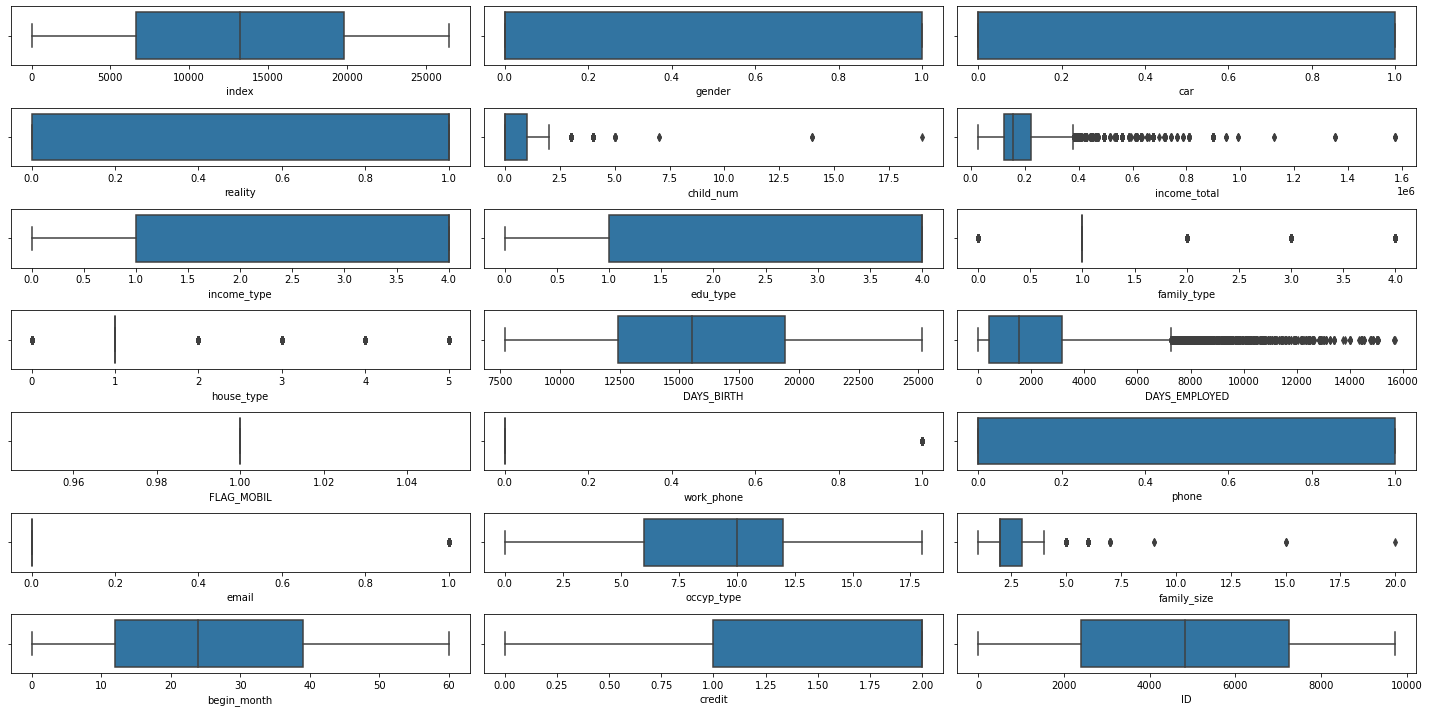

In [631]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(20,10))
index = 0
axs = axs.flatten()
for col in train2.columns:
    sns.boxplot(train2[col], ax=axs[index])
    index += 1
plt.tight_layout()

In [633]:
#outlier
train2[train2['child_num'] > 5]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID
8462,8462,1,1,1,14,225000.0,4,4,2,1,...,1689,1,0,0,0,4,15.0,7.0,2.0,9523
9021,9021,1,1,1,14,225000.0,4,4,2,1,...,1689,1,0,0,0,4,15.0,58.0,2.0,9523
10731,10731,0,0,1,19,112500.0,4,4,3,1,...,1853,1,1,1,0,18,20.0,5.0,2.0,4500
25313,25313,0,0,0,7,157500.0,4,4,1,1,...,1649,1,1,1,0,1,9.0,26.0,2.0,1484
25390,25390,1,1,1,14,225000.0,4,4,2,1,...,1689,1,0,0,0,4,15.0,43.0,2.0,9523
25638,25638,0,0,0,7,157500.0,4,4,1,1,...,1649,1,1,1,0,1,9.0,31.0,2.0,1484


In [634]:
train2 = train2[train2['child_num'] <= 5]
test2 = test2[test2['child_num'] <= 5]
display(train2, test2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,...,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID
0,0,0,0,0,0,202500.0,0,1,1,2,...,4709,1,0,0,0,12,2.0,6.0,1.0,583
1,1,0,0,1,1,247500.0,0,4,0,1,...,1540,1,0,0,1,8,3.0,5.0,1.0,4348
2,2,1,1,1,0,450000.0,4,1,1,1,...,4434,1,0,1,0,10,2.0,22.0,2.0,9190
3,3,0,0,1,0,202500.0,0,4,1,1,...,2092,1,0,1,0,15,2.0,37.0,0.0,2777
4,4,0,1,1,0,157500.0,2,1,1,1,...,2105,1,0,0,0,10,2.0,26.0,2.0,5471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,...,1984,1,0,0,0,3,4.0,2.0,1.0,1427
26453,26453,0,0,1,1,180000.0,4,1,2,1,...,2475,1,0,0,0,12,2.0,47.0,2.0,4248
26454,26454,0,1,0,0,292500.0,4,4,0,5,...,2015,1,0,0,0,3,2.0,25.0,2.0,5031
26455,26455,1,0,1,0,171000.0,4,2,3,1,...,107,1,0,0,0,8,1.0,59.0,2.0,7070


,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,ID
0,26457,1,1,0,0,112500.0,1,4,0,1,21990,0,1,0,1,0,12,2.0,60.0,7699
1,26458,0,0,1,0,135000.0,2,1,1,1,18964,8671,1,0,1,0,3,2.0,36.0,2069
2,26459,0,0,1,0,69372.0,4,4,1,1,15887,217,1,1,1,0,8,2.0,40.0,3592
3,26460,1,1,0,0,112500.0,0,4,1,1,19270,2531,1,1,0,0,4,2.0,41.0,7695
4,26461,0,1,1,0,225000.0,2,1,1,1,17822,9385,1,1,0,0,10,2.0,8.0,5667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,202500.0,4,2,1,1,18593,5434,1,1,1,0,0,2.0,19.0,5615
9996,36453,1,1,1,0,202500.0,4,4,0,1,10886,1315,1,1,0,0,8,2.0,34.0,8820
9997,36454,0,0,1,0,292500.0,4,4,1,1,21016,14018,1,0,0,0,11,2.0,55.0,3270
9998,36455,0,1,0,0,180000.0,0,4,1,1,16541,1085,1,0,1,0,12,2.0,33.0,4918


In [635]:
#drop unnecessary columns
train2 = train2.drop(['index', 'FLAG_MOBIL'], axis=1)
test2 = test2.drop(['index', 'FLAG_MOBIL'], axis=1)
display(train2, test2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,ID
0,0,0,0,0,202500.0,0,1,1,2,13899,4709,0,0,0,12,2.0,6.0,1.0,583
1,0,0,1,1,247500.0,0,4,0,1,11380,1540,0,0,1,8,3.0,5.0,1.0,4348
2,1,1,1,0,450000.0,4,1,1,1,19087,4434,0,1,0,10,2.0,22.0,2.0,9190
3,0,0,1,0,202500.0,0,4,1,1,15088,2092,0,1,0,15,2.0,37.0,0.0,2777
4,0,1,1,0,157500.0,2,1,1,1,15037,2105,0,0,0,10,2.0,26.0,2.0,5471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,2,4,1,1,12079,1984,0,0,0,3,4.0,2.0,1.0,1427
26453,0,0,1,1,180000.0,4,1,2,1,15291,2475,0,0,0,12,2.0,47.0,2.0,4248
26454,0,1,0,0,292500.0,4,4,0,5,10082,2015,0,0,0,3,2.0,25.0,2.0,5031
26455,1,0,1,0,171000.0,4,2,3,1,10145,107,0,0,0,8,1.0,59.0,2.0,7070


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,ID
0,1,1,0,0,112500.0,1,4,0,1,21990,0,0,1,0,12,2.0,60.0,7699
1,0,0,1,0,135000.0,2,1,1,1,18964,8671,0,1,0,3,2.0,36.0,2069
2,0,0,1,0,69372.0,4,4,1,1,15887,217,1,1,0,8,2.0,40.0,3592
3,1,1,0,0,112500.0,0,4,1,1,19270,2531,1,0,0,4,2.0,41.0,7695
4,0,1,1,0,225000.0,2,1,1,1,17822,9385,1,0,0,10,2.0,8.0,5667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,202500.0,4,2,1,1,18593,5434,1,1,0,0,2.0,19.0,5615
9996,1,1,1,0,202500.0,4,4,0,1,10886,1315,1,0,0,8,2.0,34.0,8820
9997,0,0,1,0,292500.0,4,4,1,1,21016,14018,0,0,0,11,2.0,55.0,3270
9998,0,1,0,0,180000.0,0,4,1,1,16541,1085,0,1,0,12,2.0,33.0,4918


In [636]:
#age
train2['age'] = train2['DAYS_BIRTH'] // 365 + round((train2['DAYS_BIRTH'] % 365) / 365, 1)
test2['age'] = test2['DAYS_BIRTH'] // 365 + round((test2['DAYS_BIRTH'] % 365) / 365, 1)

#months, week of birth
train2['m_DAYS_BIRTH'] = train2['DAYS_BIRTH'] // 30 % 12
test2['m_DAYS_BIRTH'] = test2['DAYS_BIRTH'] // 30 % 12
train2['w_DAYS_BIRTH'] = train2['DAYS_BIRTH'] // 7 % 4
test2['w_DAYS_BIRTH'] = test2['DAYS_BIRTH'] // 7 % 4
display(train2, test2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,phone,email,occyp_type,family_size,begin_month,credit,ID,age,m_DAYS_BIRTH,w_DAYS_BIRTH
0,0,0,0,0,202500.0,0,1,1,2,13899,...,0,0,12,2.0,6.0,1.0,583,38.1,7,1
1,0,0,1,1,247500.0,0,4,0,1,11380,...,0,1,8,3.0,5.0,1.0,4348,31.2,7,1
2,1,1,1,0,450000.0,4,1,1,1,19087,...,1,0,10,2.0,22.0,2.0,9190,52.3,0,2
3,0,0,1,0,202500.0,0,4,1,1,15088,...,1,0,15,2.0,37.0,0.0,2777,41.3,10,3
4,0,1,1,0,157500.0,2,1,1,1,15037,...,0,0,10,2.0,26.0,2.0,5471,41.2,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,2,4,1,1,12079,...,0,0,3,4.0,2.0,1.0,1427,33.1,6,1
26453,0,0,1,1,180000.0,4,1,2,1,15291,...,0,0,12,2.0,47.0,2.0,4248,41.9,5,0
26454,0,1,0,0,292500.0,4,4,0,5,10082,...,0,0,3,2.0,25.0,2.0,5031,27.6,0,0
26455,1,0,1,0,171000.0,4,2,3,1,10145,...,0,0,8,1.0,59.0,2.0,7070,27.8,2,1


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,work_phone,phone,email,occyp_type,family_size,begin_month,ID,age,m_DAYS_BIRTH,w_DAYS_BIRTH
0,1,1,0,0,112500.0,1,4,0,1,21990,...,0,1,0,12,2.0,60.0,7699,60.2,1,1
1,0,0,1,0,135000.0,2,1,1,1,18964,...,0,1,0,3,2.0,36.0,2069,52.0,8,1
2,0,0,1,0,69372.0,4,4,1,1,15887,...,1,1,0,8,2.0,40.0,3592,43.5,1,1
3,1,1,0,0,112500.0,0,4,1,1,19270,...,1,0,0,4,2.0,41.0,7695,52.8,6,0
4,0,1,1,0,225000.0,2,1,1,1,17822,...,1,0,0,10,2.0,8.0,5667,48.8,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,202500.0,4,2,1,1,18593,...,1,1,0,0,2.0,19.0,5615,50.9,7,0
9996,1,1,1,0,202500.0,4,4,0,1,10886,...,1,0,0,8,2.0,34.0,8820,29.8,2,3
9997,0,0,1,0,292500.0,4,4,1,1,21016,...,0,0,0,11,2.0,55.0,3270,57.6,4,2
9998,0,1,0,0,180000.0,0,4,1,1,16541,...,0,1,0,12,2.0,33.0,4918,45.3,11,3


In [637]:
#year, month, week of employed
train2['y_DAYS_EMPLOYED'] = train2['DAYS_EMPLOYED'] // 365
train2['m_DAYS_EMPLOYED'] = train2['DAYS_EMPLOYED'] // 30 % 12
train2['w_DAYS_EMPLOYED'] = train2['DAYS_EMPLOYED'] // 7 % 4
test2['y_DAYS_EMPLOYED'] = test2['DAYS_EMPLOYED'] // 365
test2['m_DAYS_EMPLOYED'] = test2['DAYS_EMPLOYED'] // 30 % 12
test2['w_DAYS_EMPLOYED'] = test2['DAYS_EMPLOYED'] // 7 % 4
display(train2, test2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,family_size,begin_month,credit,ID,age,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED
0,0,0,0,0,202500.0,0,1,1,2,13899,...,2.0,6.0,1.0,583,38.1,7,1,12,0,0
1,0,0,1,1,247500.0,0,4,0,1,11380,...,3.0,5.0,1.0,4348,31.2,7,1,4,3,0
2,1,1,1,0,450000.0,4,1,1,1,19087,...,2.0,22.0,2.0,9190,52.3,0,2,12,3,1
3,0,0,1,0,202500.0,0,4,1,1,15088,...,2.0,37.0,0.0,2777,41.3,10,3,5,9,2
4,0,1,1,0,157500.0,2,1,1,1,15037,...,2.0,26.0,2.0,5471,41.2,9,0,5,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,2,4,1,1,12079,...,4.0,2.0,1.0,1427,33.1,6,1,5,6,3
26453,0,0,1,1,180000.0,4,1,2,1,15291,...,2.0,47.0,2.0,4248,41.9,5,0,6,10,1
26454,0,1,0,0,292500.0,4,4,0,5,10082,...,2.0,25.0,2.0,5031,27.6,0,0,5,7,3
26455,1,0,1,0,171000.0,4,2,3,1,10145,...,1.0,59.0,2.0,7070,27.8,2,1,0,3,3


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,occyp_type,family_size,begin_month,ID,age,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED
0,1,1,0,0,112500.0,1,4,0,1,21990,...,12,2.0,60.0,7699,60.2,1,1,0,0,0
1,0,0,1,0,135000.0,2,1,1,1,18964,...,3,2.0,36.0,2069,52.0,8,1,23,1,2
2,0,0,1,0,69372.0,4,4,1,1,15887,...,8,2.0,40.0,3592,43.5,1,1,0,7,3
3,1,1,0,0,112500.0,0,4,1,1,19270,...,4,2.0,41.0,7695,52.8,6,0,6,0,1
4,0,1,1,0,225000.0,2,1,1,1,17822,...,10,2.0,8.0,5667,48.8,6,2,25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,202500.0,4,2,1,1,18593,...,0,2.0,19.0,5615,50.9,7,0,14,1,0
9996,1,1,1,0,202500.0,4,4,0,1,10886,...,8,2.0,34.0,8820,29.8,2,3,3,7,3
9997,0,0,1,0,292500.0,4,4,1,1,21016,...,11,2.0,55.0,3270,57.6,4,2,38,11,2
9998,0,1,0,0,180000.0,0,4,1,1,16541,...,12,2.0,33.0,4918,45.3,11,3,2,0,3


In [638]:
#income per family member
train2['income_per_member'] = train2['income_total'] / train2['family_size']
test2['income_per_member'] = test2['income_total'] / test2['family_size']

In [639]:
#before employed
train2['before_employed'] = train2['DAYS_BIRTH'] - train2['DAYS_EMPLOYED']
train2['m_before_employed'] = train2['before_employed'] // 30 % 12
train2['w_before_employed'] = train2['before_employed'] // 7 % 4
test2['before_employed'] = test2['DAYS_BIRTH'] - test2['DAYS_EMPLOYED']
test2['m_before_employed'] = test2['before_employed'] // 30 % 12
test2['w_before_employed'] = test2['before_employed'] // 7 % 4

In [640]:
#ability
train2['ability'] = train2['income_total'] / (train2['DAYS_BIRTH'] + train2['DAYS_EMPLOYED'])
test2['ability'] = test2['income_total'] / (test2['DAYS_BIRTH'] + test2['DAYS_EMPLOYED'])

In [641]:
display(train2, test2)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED,income_per_member,before_employed,m_before_employed,w_before_employed,ability
0,0,0,0,0,202500.0,0,1,1,2,13899,...,7,1,12,0,0,101250.0,9190,6,0,10.882416
1,0,0,1,1,247500.0,0,4,0,1,11380,...,7,1,4,3,0,82500.0,9840,4,1,19.156347
2,1,1,1,0,450000.0,4,1,1,1,19087,...,0,2,12,3,1,225000.0,14653,8,1,19.131840
3,0,0,1,0,202500.0,0,4,1,1,15088,...,10,3,5,9,2,101250.0,12996,1,0,11.786962
4,0,1,1,0,157500.0,2,1,1,1,15037,...,9,0,5,10,0,78750.0,12932,11,3,9.187959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,2,4,1,1,12079,...,6,1,5,6,3,56250.0,10095,0,2,15.999431
26453,0,0,1,1,180000.0,4,1,2,1,15291,...,5,0,6,10,1,90000.0,12816,7,2,10.131712
26454,0,1,0,0,292500.0,4,4,0,5,10082,...,0,0,5,7,3,146250.0,8067,4,0,24.179549
26455,1,0,1,0,171000.0,4,2,3,1,10145,...,2,1,0,3,3,171000.0,10038,10,2,16.679672


,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED,income_per_member,before_employed,m_before_employed,w_before_employed,ability
0,1,1,0,0,112500.0,1,4,0,1,21990,...,1,1,0,0,0,56250.0,21990,1,1,5.115962
1,0,0,1,0,135000.0,2,1,1,1,18964,...,8,1,23,1,2,67500.0,10293,7,2,4.885109
2,0,0,1,0,69372.0,4,4,1,1,15887,...,1,1,0,7,3,34686.0,15670,6,2,4.307750
3,1,1,0,0,112500.0,0,4,1,1,19270,...,6,0,6,0,1,56250.0,16739,5,3,5.160314
4,0,1,1,0,225000.0,2,1,1,1,17822,...,6,2,25,0,0,112500.0,8437,5,1,8.269931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,202500.0,4,2,1,1,18593,...,7,0,14,1,0,101250.0,13159,6,3,8.428018
9996,1,1,1,0,202500.0,4,4,0,1,10886,...,2,3,3,7,3,101250.0,9571,7,3,16.597000
9997,0,0,1,0,292500.0,4,4,1,1,21016,...,4,2,38,11,2,146250.0,6998,5,3,8.349032
9998,0,1,0,0,180000.0,0,4,1,1,16541,...,11,3,2,0,3,90000.0,15456,11,0,10.212187


<AxesSubplot:>

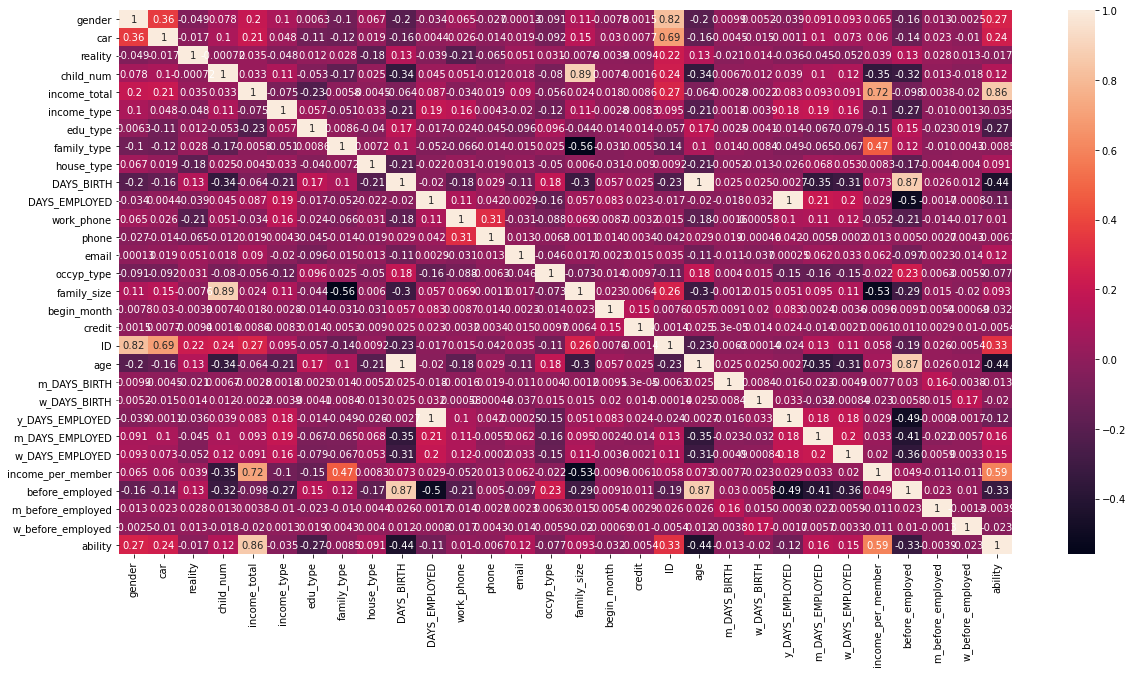

In [642]:
plt.figure(figsize=(20,10))
sns.heatmap(train2.corr(), annot=True)

In [643]:
#drop multicollinearity cols
train2.drop(['child_num', 'DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)
test2.drop(['child_num', 'DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1, inplace=True)
display(train2, test2)

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,...,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED,income_per_member,before_employed,m_before_employed,w_before_employed,ability
0,0,0,0,202500.0,0,1,1,2,0,0,...,7,1,12,0,0,101250.0,9190,6,0,10.882416
1,0,0,1,247500.0,0,4,0,1,0,0,...,7,1,4,3,0,82500.0,9840,4,1,19.156347
2,1,1,1,450000.0,4,1,1,1,0,1,...,0,2,12,3,1,225000.0,14653,8,1,19.131840
3,0,0,1,202500.0,0,4,1,1,0,1,...,10,3,5,9,2,101250.0,12996,1,0,11.786962
4,0,1,1,157500.0,2,1,1,1,0,0,...,9,0,5,10,0,78750.0,12932,11,3,9.187959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,225000.0,2,4,1,1,0,0,...,6,1,5,6,3,56250.0,10095,0,2,15.999431
26453,0,0,1,180000.0,4,1,2,1,0,0,...,5,0,6,10,1,90000.0,12816,7,2,10.131712
26454,0,1,0,292500.0,4,4,0,5,0,0,...,0,0,5,7,3,146250.0,8067,4,0,24.179549
26455,1,0,1,171000.0,4,2,3,1,0,0,...,2,1,0,3,3,171000.0,10038,10,2,16.679672


,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,...,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED,income_per_member,before_employed,m_before_employed,w_before_employed,ability
0,1,1,0,112500.0,1,4,0,1,0,1,...,1,1,0,0,0,56250.0,21990,1,1,5.115962
1,0,0,1,135000.0,2,1,1,1,0,1,...,8,1,23,1,2,67500.0,10293,7,2,4.885109
2,0,0,1,69372.0,4,4,1,1,1,1,...,1,1,0,7,3,34686.0,15670,6,2,4.307750
3,1,1,0,112500.0,0,4,1,1,1,0,...,6,0,6,0,1,56250.0,16739,5,3,5.160314
4,0,1,1,225000.0,2,1,1,1,1,0,...,6,2,25,0,0,112500.0,8437,5,1,8.269931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,202500.0,4,2,1,1,1,1,...,7,0,14,1,0,101250.0,13159,6,3,8.428018
9996,1,1,1,202500.0,4,4,0,1,1,0,...,2,3,3,7,3,101250.0,9571,7,3,16.597000
9997,0,0,1,292500.0,4,4,1,1,0,0,...,4,2,38,11,2,146250.0,6998,5,3,8.349032
9998,0,1,0,180000.0,0,4,1,1,0,1,...,11,3,2,0,3,90000.0,15456,11,0,10.212187


In [644]:
train2.skew()

gender               0.718002
car                  0.495700
reality             -0.742084
income_total         2.659126
income_type         -0.295432
edu_type            -0.859202
family_type          1.286469
house_type           3.316388
work_phone           1.319382
phone                0.903289
email                2.837989
occyp_type          -0.428439
family_size          0.875964
begin_month          0.290062
credit              -1.124043
ID                   0.042291
age                  0.185915
m_DAYS_BIRTH         0.016542
w_DAYS_BIRTH         0.002526
y_DAYS_EMPLOYED      1.817268
m_DAYS_EMPLOYED      0.204559
w_DAYS_EMPLOYED      0.293755
income_per_member    2.589302
before_employed      0.559431
m_before_employed    0.017120
w_before_employed   -0.023011
ability              2.773857
dtype: float64

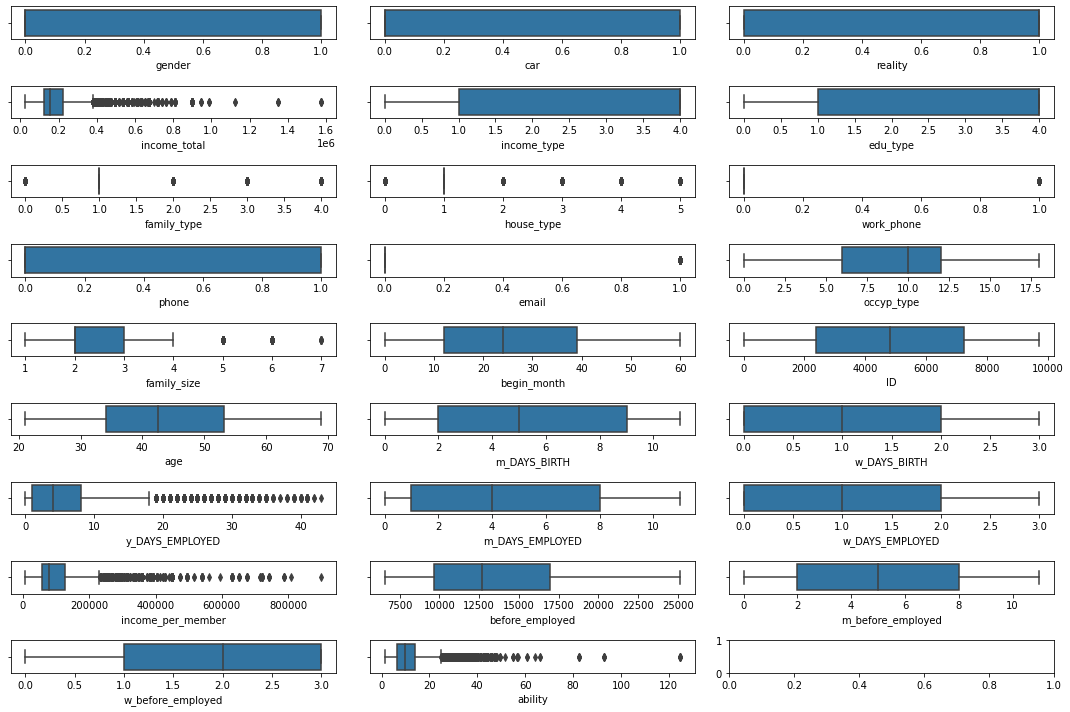

In [648]:
fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(15,10))
index = 0
axs = axs.flatten()
for col in train2.columns:
    if col != 'credit':
        sns.boxplot(train2[col], ax=axs[index])
        index += 1
plt.tight_layout()

<AxesSubplot:xlabel='income_total', ylabel='Count'>

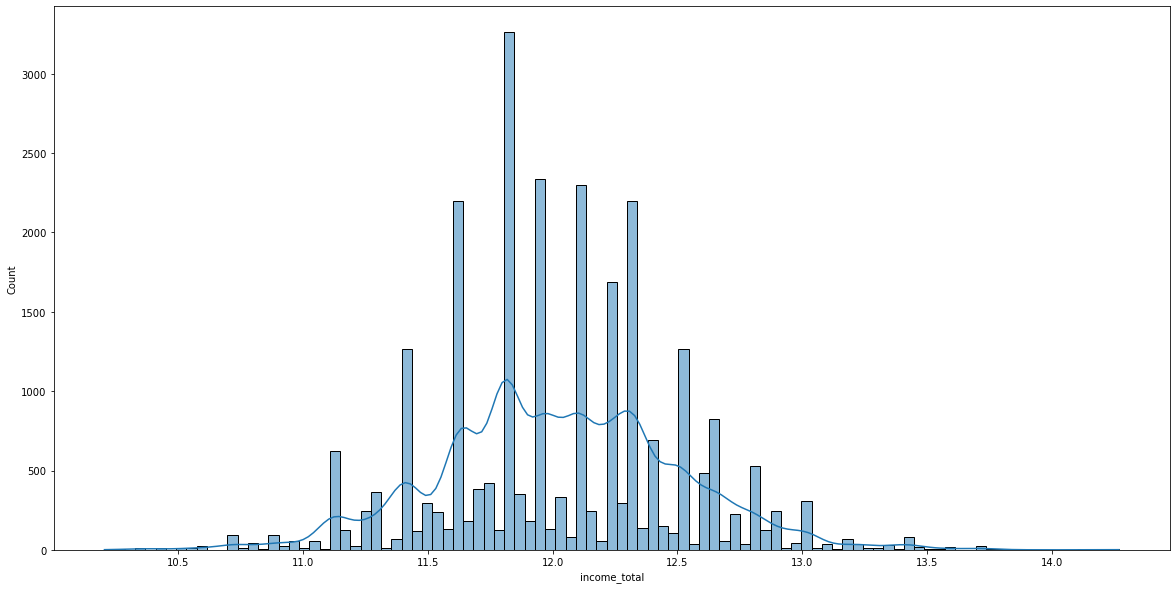

In [649]:
fig = plt.figure(figsize=(20,10))
sns.histplot(np.log(train2['income_total']), kde=True)

<AxesSubplot:ylabel='Count'>

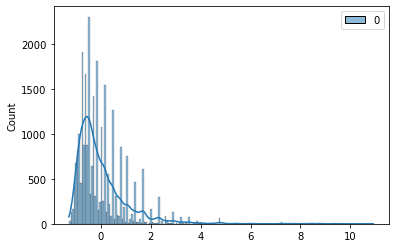

In [650]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data = ss.fit_transform(train2['income_per_member'].values.reshape(-1,1))
sns.histplot(data, kde=True)

<AxesSubplot:ylabel='Count'>

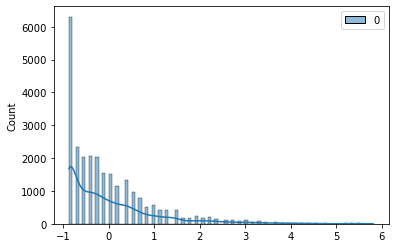

In [651]:
data = ss.fit_transform(train2['y_DAYS_EMPLOYED'].values.reshape(-1,1))
sns.histplot(data, kde=True)

<AxesSubplot:xlabel='income_per_member', ylabel='Count'>

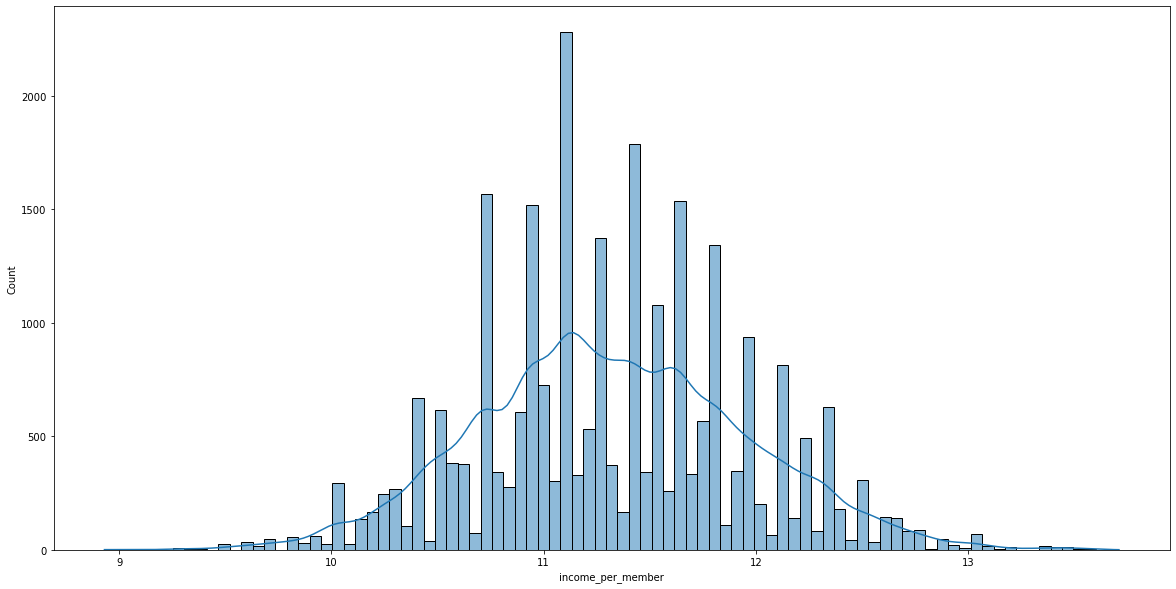

In [652]:
fig = plt.figure(figsize=(20,10))
sns.histplot(np.log(train2['income_per_member']), kde=True)

<AxesSubplot:xlabel='ability', ylabel='Count'>

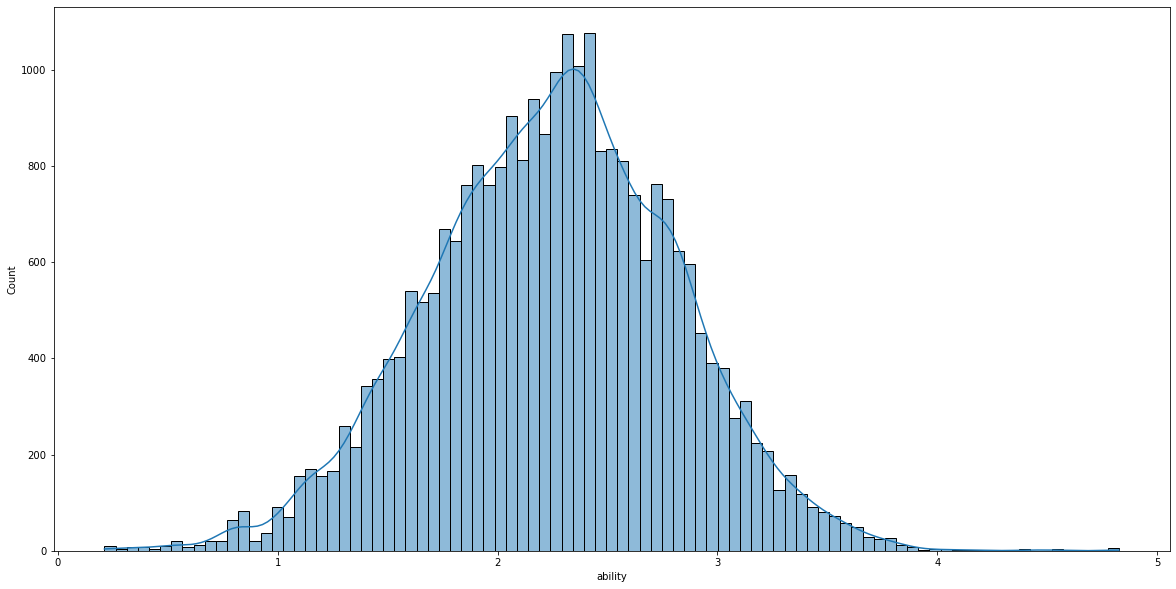

In [653]:
fig = plt.figure(figsize=(20,10))
sns.histplot(np.log(train2['ability']), kde=True)

In [654]:
col = ['income_total', 'income_per_member', 'ability']
train2[col] = np.log(train2[col])
train2

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,...,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED,income_per_member,before_employed,m_before_employed,w_before_employed,ability
0,0,0,0,12.218495,0,1,1,2,0,0,...,7,1,12,0,0,11.525348,9190,6,0,2.387148
1,0,0,1,12.419166,0,4,0,1,0,0,...,7,1,4,3,0,11.320554,9840,4,1,2.952634
2,1,1,1,13.017003,4,1,1,1,0,1,...,0,2,12,3,1,12.323856,14653,8,1,2.951354
3,0,0,1,12.218495,0,4,1,1,0,1,...,10,3,5,9,2,11.525348,12996,1,0,2.466994
4,0,1,1,11.967181,2,1,1,1,0,0,...,9,0,5,10,0,11.274034,12932,11,3,2.217894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,12.323856,2,4,1,1,0,0,...,6,1,5,6,3,10.937561,10095,0,2,2.772553
26453,0,0,1,12.100712,4,1,2,1,0,0,...,5,0,6,10,1,11.407565,12816,7,2,2.315670
26454,0,1,0,12.586220,4,4,0,5,0,0,...,0,0,5,7,3,11.893073,8067,4,0,3.185507
26455,1,0,1,12.049419,4,2,3,1,0,0,...,2,1,0,3,3,12.049419,10038,10,2,2.814191


In [655]:
test2[col] = np.log(test2[col])
test2

,gender,car,reality,income_total,income_type,edu_type,family_type,house_type,work_phone,phone,...,m_DAYS_BIRTH,w_DAYS_BIRTH,y_DAYS_EMPLOYED,m_DAYS_EMPLOYED,w_DAYS_EMPLOYED,income_per_member,before_employed,m_before_employed,w_before_employed,ability
0,1,1,0,11.630709,1,4,0,1,0,1,...,1,1,0,0,0,10.937561,21990,1,1,1.632365
1,0,0,1,11.813030,2,1,1,1,0,1,...,8,1,23,1,2,11.119883,10293,7,2,1.586192
2,0,0,1,11.147239,4,4,1,1,1,1,...,1,1,0,7,3,10.454091,15670,6,2,1.460416
3,1,1,0,11.630709,0,4,1,1,1,0,...,6,0,6,0,1,10.937561,16739,5,3,1.640997
4,0,1,1,12.323856,2,1,1,1,1,0,...,6,2,25,0,0,11.630709,8437,5,1,2.112626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,12.218495,4,2,1,1,1,1,...,7,0,14,1,0,11.525348,13159,6,3,2.131562
9996,1,1,1,12.218495,4,4,0,1,1,0,...,2,3,3,7,3,11.525348,9571,7,3,2.809222
9997,0,0,1,12.586220,4,4,1,1,0,0,...,4,2,38,11,2,11.893073,6998,5,3,2.122146
9998,0,1,0,12.100712,0,4,1,1,0,1,...,11,3,2,0,3,11.407565,15456,11,0,2.323582


In [656]:
train2.dtypes

gender                 int64
car                    int64
reality                int64
income_total         float64
income_type            int64
edu_type               int64
family_type            int64
house_type             int64
work_phone             int64
phone                  int64
email                  int64
occyp_type             int64
family_size          float64
begin_month          float64
credit               float64
ID                     int64
age                  float64
m_DAYS_BIRTH           int64
w_DAYS_BIRTH           int64
y_DAYS_EMPLOYED        int64
m_DAYS_EMPLOYED        int64
w_DAYS_EMPLOYED        int64
income_per_member    float64
before_employed        int64
m_before_employed      int64
w_before_employed      int64
ability              float64
dtype: object

In [657]:
from sklearn.preprocessing import StandardScaler
col = ['income_total', 'income_per_member', 'ability']
numeric_cols = [cols for cols in train2.columns[12:] if cols not in col and cols != 'credit']
ss = StandardScaler()
train2[numeric_cols] = ss.fit_transform(train2[numeric_cols])
test2[numeric_cols] = ss.transform(test2[numeric_cols])

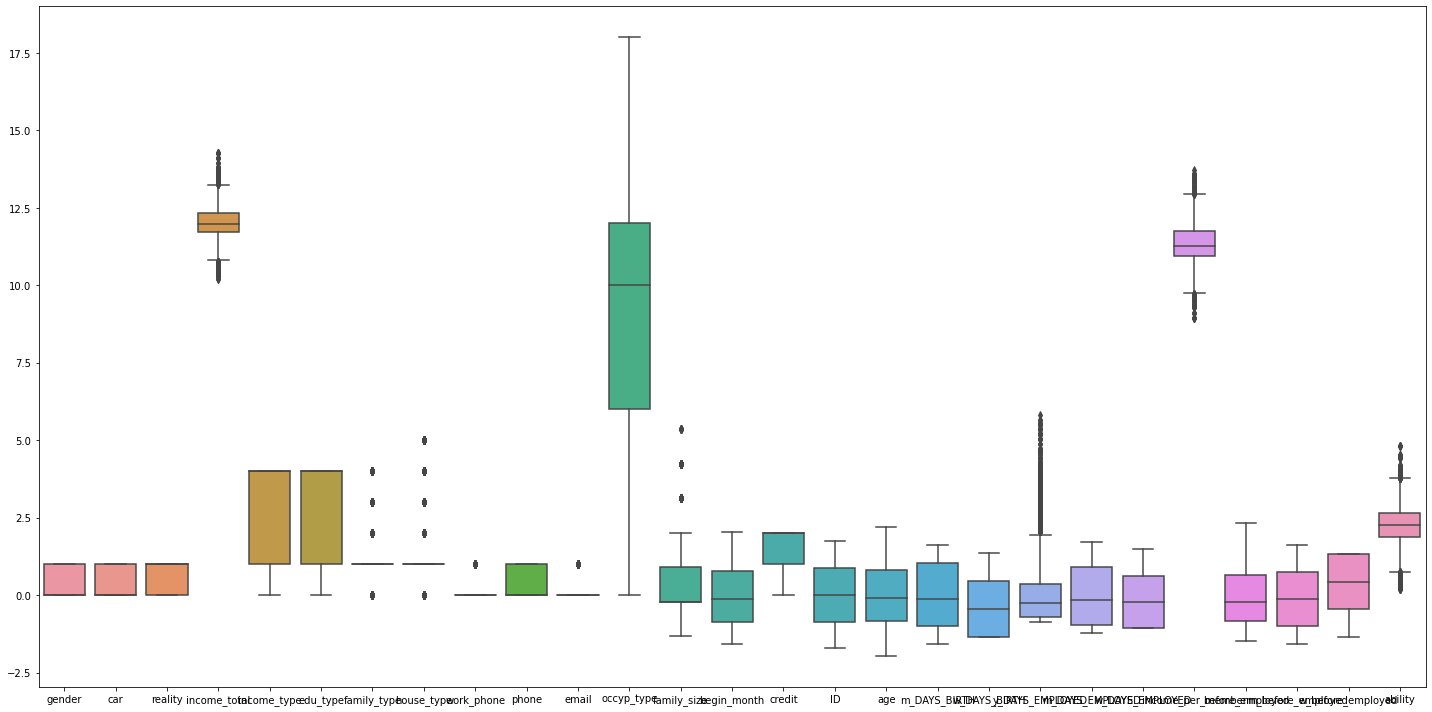

In [658]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=train2)
plt.tight_layout()

# **[데이터 모델링]**

In [659]:
train_x=train2.drop('credit', axis=1)
train_y=train2[['credit']]
test_x=test2

In [660]:
print(train_x.shape, train_y.shape, test.shape)

(26451, 26) (26451, 1) (10000, 20)


In [662]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

In [664]:
from catboost import CatBoostClassifier
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=100, verbose=100, use_best_model=True)
output = cbc.predict_proba(test_x)
output

Learning rate set to 0.114625
0:	learn: 1.0350944	test: 1.0364159	best: 1.0364159 (0)	total: 112ms	remaining: 1m 52s
100:	learn: 0.7512107	test: 0.7902854	best: 0.7902854 (100)	total: 1.8s	remaining: 16.1s
200:	learn: 0.7025229	test: 0.7757291	best: 0.7757291 (200)	total: 3.52s	remaining: 14s
300:	learn: 0.6615076	test: 0.7616544	best: 0.7616544 (300)	total: 4.58s	remaining: 10.6s
400:	learn: 0.6242691	test: 0.7507122	best: 0.7507122 (400)	total: 5.79s	remaining: 8.65s
500:	learn: 0.5965510	test: 0.7451222	best: 0.7451222 (500)	total: 6.99s	remaining: 6.96s
600:	learn: 0.5716853	test: 0.7406505	best: 0.7406505 (600)	total: 8.02s	remaining: 5.33s
700:	learn: 0.5498562	test: 0.7367036	best: 0.7366298 (699)	total: 8.96s	remaining: 3.82s
800:	learn: 0.5284050	test: 0.7329863	best: 0.7329863 (800)	total: 10.1s	remaining: 2.5s
900:	learn: 0.5111259	test: 0.7313018	best: 0.7311493 (873)	total: 11.1s	remaining: 1.22s
999:	learn: 0.4946954	test: 0.7297579	best: 0.7296448 (989)	total: 12.2s	rema

array([[0.09765715, 0.41982995, 0.48251289],
       [0.3259631 , 0.09664456, 0.57739235],
       [0.06391287, 0.1423831 , 0.79370403],
       ...,
       [0.12046819, 0.04703847, 0.83249334],
       [0.09911649, 0.41714517, 0.48373835],
       [0.02593064, 0.18372194, 0.79034741]])

In [31]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, log_loss
# from sklearn.metrics import f1_score
# # from tensorflow.keras.utils import to_categorical


# print("Train set: ")
# print(X_train.shape)
# print(y_train.shape)
# print("===========")
# print("Validation set: ")
# print(X_val.shape)
# print(y_val.shape)


# clf=RandomForestClassifier()
# clf.fit(X_train, y_train)
# y_pred=clf.predict_proba(X_val)

# print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 18)
(19842, 1)
Validation set: 
(6615, 18)
(6615, 1)


In [ ]:
# from sklearn.model_selection import KFold, StratifiedKFold

# def run_kfold(clf):
#     folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
#     outcomes=[]
#     sub=np.zeros((test_x.shape[0], 3))  
#     for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
#         X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
#         y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
#         clf.fit(X_train, y_train)
        
#         predictions=clf.predict_proba(X_val)
        
#         logloss=log_loss(to_categorical(y_val['credit']), predictions)
#         outcomes.append(logloss)
#         print(f"FOLD {n_fold} : logloss:{logloss}")
        
#         sub+=clf.predict_proba(test_x)
        
        
#     mean_outcome=np.mean(outcomes)
    
#     print("Mean:{}".format(mean_outcome))
#     return sub/folds.n_splits

# my_submission = run_kfold(clf)

FOLD 0 : logloss:1.0392087466852982
FOLD 1 : logloss:1.0279703352830671
FOLD 2 : logloss:1.1041397256249195
FOLD 3 : logloss:1.0041502045151132
FOLD 4 : logloss:1.073084268697861
Mean:1.049710656161252


In [665]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [666]:
submission.loc[:,1:]=output

In [667]:
submission

,index,0,1,2
0,26457,0.097657,0.419830,0.482513
1,26458,0.325963,0.096645,0.577392
2,26459,0.063913,0.142383,0.793704
3,26460,0.129895,0.136664,0.733441
4,26461,0.142479,0.085332,0.772189
...,...,...,...,...
9995,36452,0.054434,0.309880,0.635686
9996,36453,0.258059,0.219174,0.522766
9997,36454,0.120468,0.047038,0.832493
9998,36455,0.099116,0.417145,0.483738


In [ ]:
os.chdir('../baseline')

In [669]:
submission.to_csv('final_submission.csv', index=False)